In [5]:
from unittest.util import strclass

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [6]:
train_file_path = r"data\train.csv"
test_file_path = r"data\test.csv"
test_data = pd.read_csv(test_file_path)
train_data = pd.read_csv(train_file_path)

In [7]:
test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [8]:
X_train = train_data.drop(columns=["SalePrice"])
X_target = train_data["SalePrice"]

Ok, let's look now more deeply into missing data and also convert categorical data
Ok, let's look now more deeply into missing data and also convert categorical data


In [9]:
X_train = train_data.drop(columns=["SalePrice"])
X_target = train_data["SalePrice"]

In [10]:
X_train.select_dtypes(include=['object', 'string']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='str')

In [11]:
def make_mi_scores(X, y, random_state=0):
    X = X.copy()

    # Encode categorical features
    for col in X.select_dtypes(include=["object", "string"]):
        X[col], _ = X[col].factorize()

    mi = mutual_info_regression(
        X,
        y,
        discrete_features="auto",
        random_state=random_state
    )

    mi_scores = pd.Series(mi, index=X.columns, name="MI Score")
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores

In [12]:
X = X_train.copy()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "string"]).columns

X[num_cols] = SimpleImputer(strategy="median").fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(X[cat_cols])

In [13]:
mi_scores = make_mi_scores(X, X_target)
print(mi_scores)

OverallQual     0.562351
Neighborhood    0.494272
GrLivArea       0.484079
YearBuilt       0.370343
GarageCars      0.368134
                  ...   
3SsnPorch       0.000000
PoolArea        0.000000
PoolQC          0.000000
YrSold          0.000000
MoSold          0.000000
Name: MI Score, Length: 80, dtype: float64


Finally I can drop columns where Mutual Information columns is equal to 0, because they don't have any impact on the predicting the price

In [14]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]

In [15]:
X = drop_uninformative(X,mi_scores)

Text(0.5, 1.0, 'Mutual Information Scores')

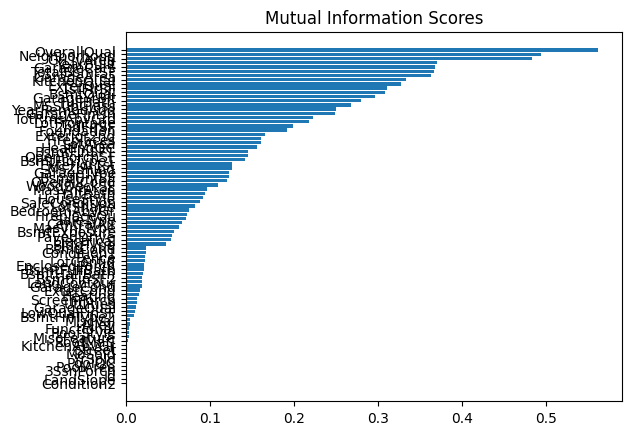

In [17]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

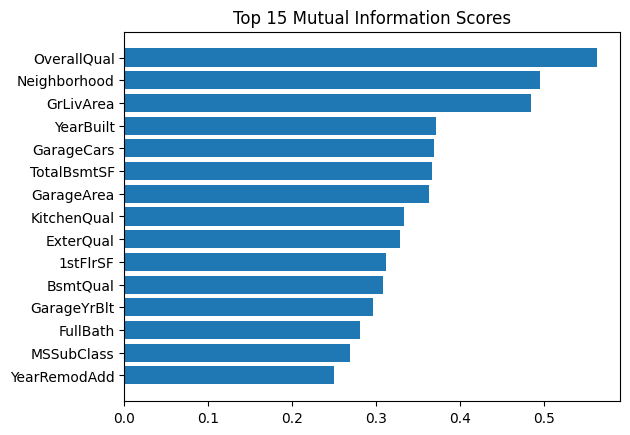

In [18]:
top_k = 15
scores = mi_scores.nlargest(top_k).sort_values()

plt.barh(scores.index, scores.values)
plt.title(f"Top {top_k} Mutual Information Scores")
plt.show()

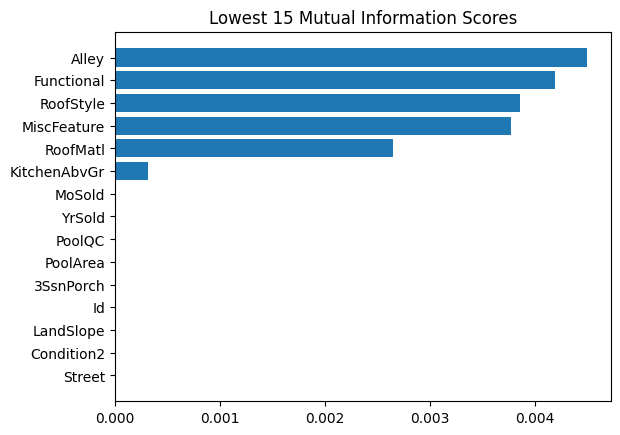

In [19]:
low_k = 15
scores = mi_scores.nsmallest(low_k)

plt.barh(scores.index, scores.values)
plt.title(f"Lowest {low_k} Mutual Information Scores")
plt.show()